DIgital Image Processing Fundamentals

0. Introduction
Images are NumPy’s arrays np.ndarray

image: np.ndarray 
pixels: array values: a[2, 3] 
channels:array dimensions 
image encoding: dtype (np.uint8, np.uint16, np.float) 
filters: functions (numpy, skimage, scipy)


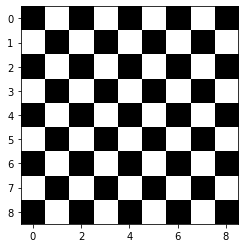

In [1]:
import numpy as np
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')

In [2]:
import skimage
from skimage import data

camera = data.camera()
# image pixel data type
camera.dtype

dtype('uint8')

In [3]:
# image size and the number of channel
camera.shape

(512, 512)

In [4]:
# Check image variable type
type(camera)

numpy.ndarray

In [5]:
# minimun and maximum pixel values 
camera.min(), camera.max()

(0, 255)

In [6]:
#image save to file and read from file
from skimage import io
io.imsave('my_camera.png', camera)
cam = io.imread('my_camera.png')

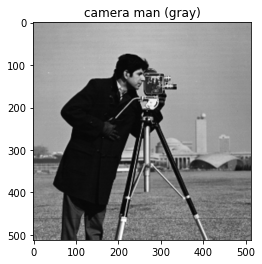

In [7]:
#gray lelvel image display
plt.imshow(cam, cmap=plt.cm.gray)
plt.title("camera man (gray)")
plt.show()

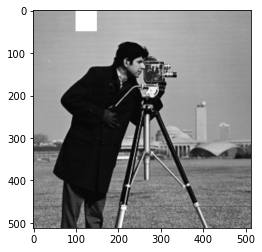

In [8]:
# pixel value modification
cam1 = cam.copy()
cam1[:50, 100:150]=255
plt.imshow(cam1, cmap=plt.cm.gray)
plt.show()

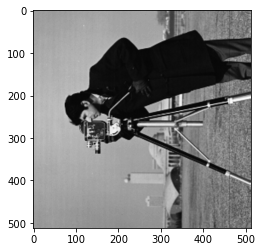

In [9]:
# image transpose 
cam2 = cam.transpose()
plt.imshow(cam2, cmap=plt.cm.gray)
plt.show()

In [10]:
# numpy indexing
cam1[200,201]

8

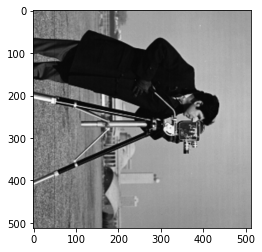

In [11]:
#image rotation by 90 degrees clockwise
Nx = camera.shape[0]
Ny = camera.shape[1]
cam3 = np.zeros([512,512], dtype='uint8')
for i in range(Nx):
    for j in range(Ny):
        cam3[j,Ny-1-i] = cam[i,j]
plt.imshow(cam3, cmap=plt.cm.gray)
plt.show()

In [12]:
#color images 
cat = data.chelsea()
type(cat)

numpy.ndarray

In [13]:
cat.shape

(300, 451, 3)

In [14]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

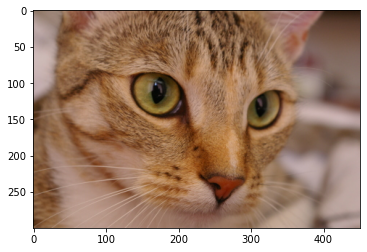

In [15]:
plt.imshow(cat)
plt.show()

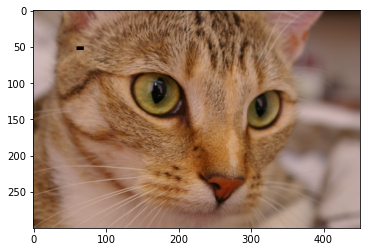

In [16]:
cat[50:55, 60:70]=0
plt.imshow(cat)

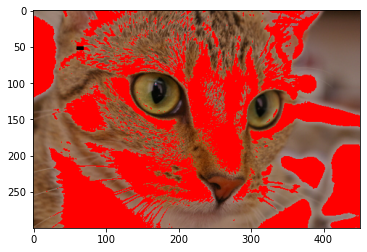

In [17]:
reddish = cat[:, :, 0] > 160
cat[reddish] = [255, 0, 0]
plt.imshow(cat)

In [18]:
def convolve(image, kernel, scale=1):
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	pad = (kW - 1)//2
	output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

	# loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
	for y in np.arange(pad, iH - pad):
		for x in np.arange(pad, iW - pad):
			roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
			output[y-pad, x-pad] = (roi * kernel).sum()*scale
			
	# rescale the output image to be in the range [0, 255]
	#output = rescale_intensity(output, in_range=(0, 255))
	#output = (output * 255).astype("uint8")
 
	# return the output image
	return output

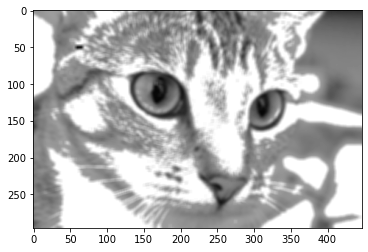

In [19]:
Ave = np.array((
	[1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
	[1,1,1,1,1],
	[1,1,1,1,1]), dtype="int")

filtered = convolve(cat[:,:,0], Ave, scale=1/25)
plt.imshow(filtered, cmap=plt.cm.gray)